# ENGS 93 HW 3
Cameron Wolfe 2/14/2024

## Imports and functions

In [78]:
import numpy as np
from scipy.stats import norm, t, chi2
from math import sqrt, floor, exp
import matplotlib.pyplot as plt
from typing import Tuple

def normal_probability_plot(data_array: np.ndarray) -> None:
    sorted_array = np.sort(data_array.flatten())

    n = len(sorted_array)

    z = np.zeros(n)

    for i in range(n):
        z[i] = norm.ppf((i + 0.5) / n)

    plt.scatter(sorted_array, z)
    plt.title("Normal Probability Plot")
    plt.xlabel("Values")
    plt.ylabel("Z value")
    plt.show()

def mean_ci(
    sample_mean: float,
    std: float,
    num_samples: int,
    interval: float = 0.95,
    bound: str = "centered",
    known_variance: bool = True,
) -> Tuple[float, ...]:
    valid_bounds = ["upper", "centered", "lower"]
    assert bound in valid_bounds

    if known_variance:
        if bound == "upper":
            z = norm.ppf(interval)
            upper_bound = sample_mean + std * z / sqrt(num_samples)

            return (-np.inf, upper_bound)

        elif bound == "centered":
            interval = 1 - ((1 - interval) / 2)
            z = norm.ppf(interval)
            upper_bound = sample_mean + std * z / sqrt(num_samples)
            lower_bound = sample_mean - std * z / sqrt(num_samples)

            return (lower_bound, upper_bound)

        else:
            z = norm.ppf(interval)
            lower_bound = sample_mean - std * z / sqrt(num_samples)

            return (lower_bound, np.inf)

    else:
        if bound == "upper":
            t_val = t.ppf(interval, num_samples - 1)
            upper_bound = sample_mean + std * t_val / sqrt(num_samples)

            return (-np.inf, upper_bound)

        elif bound == "centered":
            interval = 1 - ((1 - interval) / 2)
            t_val = t.ppf(interval, num_samples - 1)
            upper_bound = sample_mean + std * t_val / sqrt(num_samples)
            lower_bound = sample_mean - std * t_val / sqrt(num_samples)

            return (lower_bound, upper_bound)

        else:
            t_val = t.ppf(interval, num_samples - 1)
            lower_bound = sample_mean - std * t_val / sqrt(num_samples)

            return (lower_bound, np.inf)


## Problem 1

In [79]:
q1_dat = open("datafiles/q1.dat", "r")
q1_mu = 11.5
q1_np = np.array([float(x) for x in q1_dat.read().split(",")]) + q1_mu
q1_xbar = q1_np.mean()
q1_s = np.std(q1_np, ddof=1)
q1_n = len(q1_np)
print("Sample mean:", q1_xbar, "| Sample std:", q1_s, "| Num samples:", q1_n)

Sample mean: 11.415499999999998 | Sample std: 0.02211810403980814 | Num samples: 20


### Part a

In [80]:
t0 = (q1_xbar - q1_mu) / (q1_s / sqrt(q1_n))
p = 2 * (1 - t.cdf(abs(t0), q1_n - 1))
print("P-value:", p)

P-value: 5.46229728115577e-13


Because the P-value is less than $\alpha$, we reject the null hypothesis.

### Part b

In [81]:
q1_d = abs(11.4 - q1_mu) / q1_s
print("d used in OC chart", q1_d)
print("Power: 1")

d used in OC chart 4.521183181886646
Power: 1


### Part c

In [82]:
q1_d = abs(11.45 - q1_mu) / q1_s
print("d used in OC chart", q1_d)
print("Num samples:", 5)

d used in OC chart 2.2605915909433634
Num samples: 5


### Part d

In [83]:
q1_ci = mean_ci(q1_xbar, q1_s, q1_n, bound="centered", known_variance=False)
print("95% CI:", q1_ci)

95% CI: (11.405148408666673, 11.425851591333323)


Using this 95% confidence interval, we see that $\mu$ does not lie within the interval, which would lead us to reject the null hypothesis

### Part e

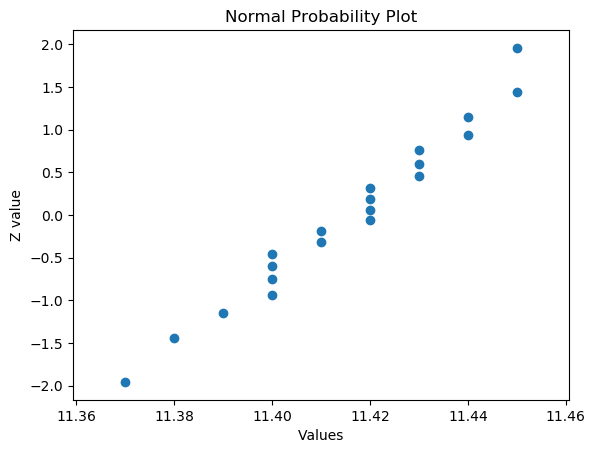

In [84]:
normal_probability_plot(q1_np)


The data looks to be normally distributed

## Problem 2

In [85]:
q2_mu = 1000
q2_xbar = 1050
q2_std = 50
q2_n = 25

### Part a

$H_0$: $\mu = 1000$, $H_1$: $\mu > 1000$

In [86]:
z0 = (q2_xbar - q2_mu) / (q2_std / sqrt(q2_n))
p = norm.sf(z0)

print("P-value:", p)

P-value: 2.866515718791933e-07


The P-value is less than $\alpha$, meaning we should reject the null hypothesis.  The new process produces longer lasting lightbulbs.

### Part b

In [87]:
q2_ci = mean_ci(q2_xbar, q2_std, q2_n)
print("95% CI:", q2_ci)

95% CI: (1030.4003601545994, 1069.5996398454006)


### Part c

We would expect the mean lifespan of these lightbulbs to be in the range given above, so around 1050 hours.

## Problem 3

In [88]:
q3_n = 15
q3_s = 0.008
q3_std = 0.01

### Part a

Assuming that the data is normally distributed.
$H_0$: $\sigma = 0.01$, $H_1$: $\sigma > 0.01$

In [89]:
q3_chi2 = (q3_n - 1) * q3_s**2 / q3_std**2
p = chi2.sf(q3_chi2, q3_n - 1)
print("P-value:", p)

P-value: 0.8336044087347059


Because the P-value is greater than $\alpha$, we do not have sufficient evidence to reject the null hypothesis.

### Part b

In [90]:
q3_lambda = 1.5
print("Probability of correct diagnosis is roughly 50% from OC chart")

Probability of correct diagnosis is roughly 50% from OC chart


### Part c

In [91]:
print("It looks like you need either 75-100 or 100+ for a power of 80%")

It looks like you need either 75-100 or 100+ for a power of 80%


## Problem 4

$\Delta p = p_2 - p_1$, $H_0$: $\Delta p = 0$, $H_1$: $\Delta p \neq 0$

In [92]:
q4_x1 = 70
q4_n1 = 100
q4_x2 = 75
q4_n2 = 100
q4_p1 = q4_x1 / q4_n1
q4_p2 = q4_x2 / q4_n2
q4_p = (q4_x1 + q4_x2) / (q4_n1 + q4_n2)

z0 = (q4_p1 - q4_p2) / sqrt(q4_p * (1 - q4_p) * (1 / q4_n1 + 1 / q4_n2))

p = 2 * norm.sf(abs(z0))

print("P-value:", p)

P-value: 0.42847288044281684


Because the P-value is greater than $\alpha$, we cannot reject the null hypothesis that the proportion of jobs meeting the specifications is the same on weekdays and weekends.

## Problem 5

In [93]:
q5_xbar_1 = 290
q5_xbar_2 = 321
q5_s1 = 12
q5_s2 = 22
q5_n1 = 10
q5_n2 = 16

### Part a

$\Delta \mu = \mu_2 - \mu_1$, $H_0$: $\Delta \mu = 0$, $H_1$: $\Delta \mu > 0$

In [94]:
t0 = (q5_xbar_1 - q5_xbar_2) / sqrt(q5_s1**2 / q5_n1 + q5_s2**2 / q5_n2)
nu = floor(
    (q5_s1**2 / q5_n1 + q5_s2**2 / q5_n2) ** 2
    / (
        (q5_s1**2 / q5_n1) ** 2 / (q5_n1 - 1)
        + (q5_s2**2 / q5_n2) ** 2 / (q5_n2 - 1)
    )
)

p = t.sf(abs(t0), nu)
print("P-value:", p)

P-value: 5.7187845712152476e-05


Because the P-value is less than $\alpha$, we can reject the null hypothesis and claim that manufacturer 2 produces parts with a higher durability.

### Part b

In [95]:
mean_difference_ci = mean_ci(
    q5_xbar_2 - q5_xbar_1,
    sqrt(q5_s1**2 / q5_n1 + q5_s2**2 / q5_n2),
    nu + 1,
    bound="lower",
    known_variance=False,
)

print("95% CI for difference:", mean_difference_ci)

95% CI for difference: (28.66232907801178, inf)


Because 0 is not included in the 95% confidence interval, we can claim that there is a difference between the two groups, rejecting the null hypothesis.

## Problem 6

In [96]:
q6_xbar = 5.91
q6_ybar = 21.47
q6_s_x = 2.88
q6_s_y = 6.75
q6_rho = 0.9
q6_n = 10

### Part a

In [97]:
beta_1 = q6_rho * q6_s_y / q6_s_x
beta_0 = q6_ybar - beta_1 * q6_xbar
print("Regression Parameters:", (beta_0, beta_1))

Regression Parameters: (9.003593749999999, 2.109375)


### Part b

In [98]:
sigma_squared = (
    1
    / (q6_n - 2)
    * (
        q6_n * q6_ybar**2
        + (q6_n - 1) * q6_s_y**2
        - 2
        * (
            beta_0 * q6_n * q6_ybar
            + beta_1
            * (
                q6_n * q6_xbar * q6_ybar
                + (q6_n - 1) * q6_rho * q6_s_x * q6_s_y
            )
        )
        + q6_n * beta_0**2
        + 2 * q6_n * beta_0 * beta_1 * q6_xbar
        + beta_1**2 * (q6_n * q6_xbar**2 + (q6_n - 1) * q6_s_x**2)
    )
)

se_0 = sqrt(
    sigma_squared * (1 / q6_n + q6_xbar**2 / ((q6_n - 1) * q6_s_x**2))
)
se_1 = sqrt(sigma_squared / ((q6_n - 1) * q6_s_x**2))
print("Standard error of beta 0 and beta 1:", (se_0, se_1))

Standard error of beta 0 and beta 1: (2.3517463298942367, 0.3611961329864672)


### Part c

In [99]:
x0 = 5.5
t_val = t.ppf(0.975, q6_n - 2)

mu_hat = beta_0 + beta_1 * x0

lower_ci = mu_hat - t_val * sqrt(
    sigma_squared
    * (1 / q6_n + (x0 - q6_xbar) ** 2 / ((q6_n - 1) * q6_s_x**2))
)

upper_ci = mu_hat + t_val * sqrt(
    sigma_squared
    * (1 / q6_n + (x0 - q6_xbar) ** 2 / ((q6_n - 1) * q6_s_x**2))
)

print("95% CI at x = 5.5:", (lower_ci, upper_ci))

95% CI at x = 5.5: (18.30396607108127, 22.90634642891873)


## Problem 7

In [100]:
ybar = 3.9
s_y = sqrt(2.7)
xbar = 10.6
s_x = sqrt(34.2)
n = 100

### Part a

In [101]:
beta_1 = (0.23 + 0.28) / 2
beta_0 = ybar - beta_1 * xbar
t_val = t.ppf(0.975, n - 2)
slope_variance = ((0.28 - beta_1) / t_val)**2
print("Slope variance:", slope_variance)

Slope variance: 0.00015870552853181467


### Part b

In [102]:
s_xx = (n - 1) * s_x**2
error_variance = slope_variance * s_xx
print("Error variance:", error_variance)

Error variance: 0.5373451785030181


### Part c

In [103]:
sse = error_variance * (n - 2)
s_yy = (n - 1) * s_y**2
R_squared = 1 - sse / s_yy
print("Coefficient of determination:", R_squared)

Coefficient of determination: 0.8029935372491741


### Part d

In [104]:
x0 = 15
t_val = t.ppf(0.9, n - 2)
std = sqrt(error_variance * (1 / n + (x0 - xbar) ** 2 / ((n - 1) * s_x**2)))
fit_val = beta_0 + beta_1 * x0
confidence_interval = (fit_val - t_val * std, fit_val + t_val * std)
print("80% CI:", confidence_interval)

80% CI: (4.90342336057917, 5.14057663942083)


## Problem 8

In [105]:
q8_np = np.genfromtxt("datafiles/streams.csv", delimiter=",")[1:, :]
x = q8_np[:, 1]
y = q8_np[:, 0]
n = len(q8_np)

### Part a

Beta 0: 0.47046684615423195 Beta 1: 20.567305084026447


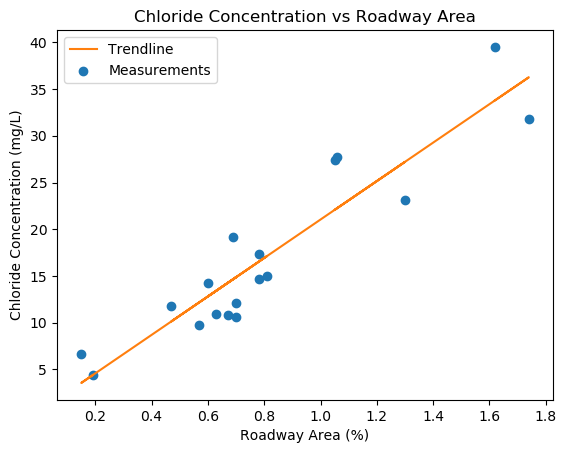

In [106]:
x_aug = np.concatenate(
    (np.ones((n, 1), dtype=float), np.reshape(x, (-1, 1))), axis=1
)

# X'X b = X'y
beta = np.linalg.solve(
    np.matmul(np.transpose(x_aug), x_aug),
    np.matmul(np.transpose(x_aug), np.reshape(y, (-1, 1))),
)
print("Beta 0:", float(beta[0]), "Beta 1:", float(beta[1]))
y_line = np.matmul(x_aug, beta)

plt.scatter(x, y, label="Measurements")
plt.plot(x, y_line, color="tab:orange", label="Trendline")
plt.title("Chloride Concentration vs Roadway Area")
plt.xlabel("Roadway Area (%)")
plt.ylabel("Chloride Concentration (mg/L)")
plt.legend(loc="upper left")
plt.show()

### Part b

In [107]:
s_xy = np.sum((x - x.mean()) * (y - y.mean()))
s_yy = np.sum((y - y.mean()) * (y - y.mean()))
sse = s_yy - beta[1] * s_xy
sigma_squared = sse / (n - 2)
print("Sigma squared:", float(sigma_squared))

Sigma squared: 13.80919909653376


### Part c

In [108]:
idx = int(np.argwhere(x == 0.47)[0])
y_fit = np.matmul(x_aug[idx, :], beta)
residual = float(y[idx] - y_fit)

print("y_hat(0.47):", float(y_fit))
print("Residual at x = 0.47:", residual)

y_hat(0.47): 10.137100235646662
Residual at x = 0.47: 1.6628997643533392


## Problem 9

In [109]:
q9_np = np.genfromtxt("datafiles/fish.csv", delimiter=",")[1:, [4, 6]]
length = q9_np[:, 0]
ddt = q9_np[:, 1]
n = len(ddt)

### Part a

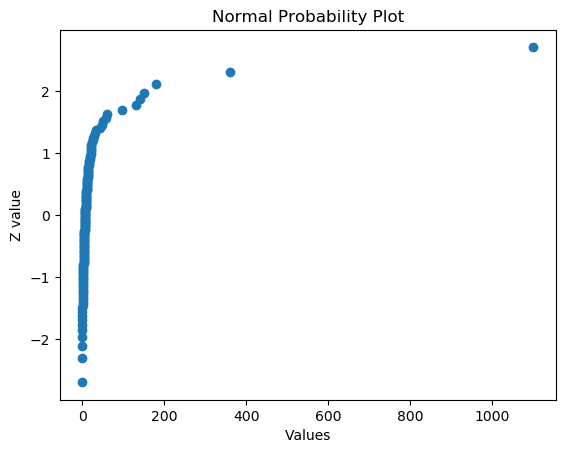

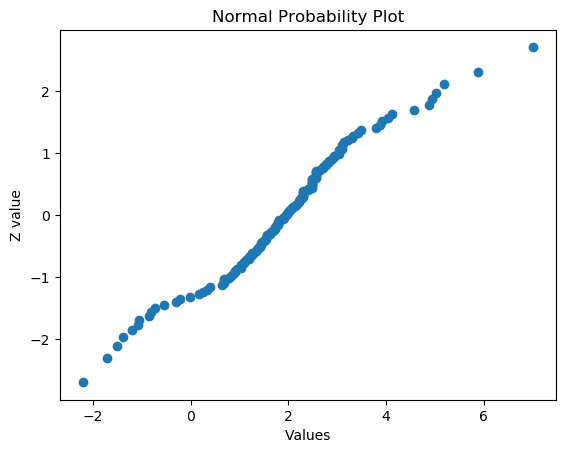

In [110]:
ln_ddt = np.log(ddt)
normal_probability_plot(ddt)
normal_probability_plot(ln_ddt)

The first plot is of DDT concentration, and the second plot is of the natural log of DDT concentration.

### Part b

In [111]:
x = np.concatenate([np.ones((n, 1)), length.reshape((-1, 1))], axis=1)
beta = np.linalg.solve(
    np.matmul(np.transpose(x), x),
    np.matmul(np.transpose(x), ln_ddt.reshape((-1, 1))),
)
print("Regression parameters:", (float(beta[0]), float(beta[1])))
ddt_35 = exp(beta[0,0] + 35 * beta[1,0])
print("Expected DDT concentration of 35cm long fish:", ddt_35)

Regression parameters: (-2.797229811807774, 0.10964755292102174)
Expected DDT concentration of 35cm long fish: 2.8304466906765318


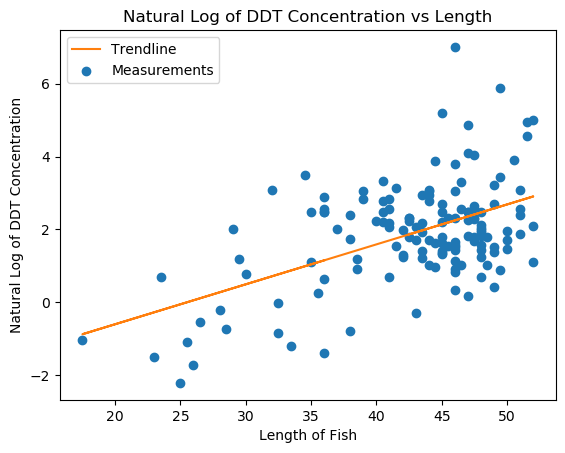

In [112]:
plt.scatter(length, ln_ddt, label="Measurements")
plt.plot(length, np.matmul(x, beta), color="tab:orange", label="Trendline")
plt.xlabel("Length of Fish")
plt.ylabel("Natural Log of DDT Concentration")
plt.title("Natural Log of DDT Concentration vs Length")
plt.legend(loc="upper left")
plt.show()

### Part c

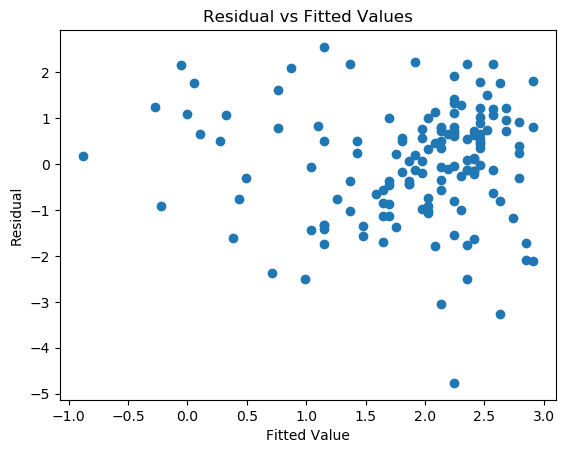

In [113]:
y_hat = np.matmul(x, beta).flatten()
residual = y_hat - ln_ddt.flatten()

plt.scatter(y_hat, residual)
plt.title("Residual vs Fitted Values")
plt.xlabel("Fitted Value")
plt.ylabel("Residual")
plt.show()

The residuals appear to have a mean of 0 and a constant variance.

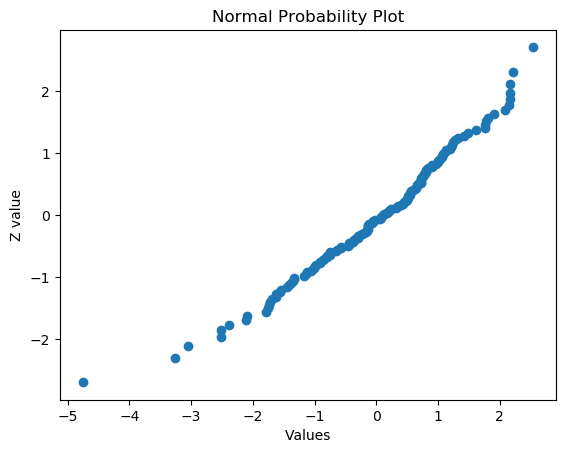

In [114]:
normal_probability_plot(residual)

Looking at the probability plot, we see that the data is normally distributed

### Part d

In [115]:
sse = np.dot(residual, residual)
sigma_squared = sse / (n - 2)
xbar = length.mean()
sxx = np.dot(length - xbar, length - xbar)
t0 = float(beta[1] / sqrt(sigma_squared / sxx))
p = 2*t.sf(t0, n-2)

print("P-value:", p)

P-value: 1.773627156620052e-11


Because P-value is less than $\alpha = 0.05$, we can reject the null hypothesis and claim that the regression shows a linear trend in the data

### Part e

In [116]:
t_val = t.ppf(0.975, n-2)
lower_ci = beta[0] - t_val * sqrt(sigma_squared*(1/n + xbar**2 / sxx))
upper_ci = beta[0] + t_val * sqrt(sigma_squared*(1/n + xbar**2 / sxx))

print("95% CI for intercept:", (float(lower_ci), float(upper_ci)))

95% CI for intercept: (-4.082778940381235, -1.511680683234313)


If the confidence interval included 0, then it would mean that there is no significant offset in the relationship between the natural log of DDT and fish length.